In [1]:
# Usando `ìnline` no sea necesario escribir código adicional `plt.show()` para mostrar los gráficos
%matplotlib inline

import pandas as pd
import numpy as np

# `plt` es un alias para el módulo `matplotlib.pyplot`
import matplotlib.pyplot as plt

# importa libreria seaborn (contenedor de matplotlib)
import seaborn as sns

## Envoltorios de Matplotlib (Pandas y Seaborn)

Matplotlib es una biblioteca de visualización muy popular, pero definitivamente tiene fallas.

1. Los valores predeterminados de Matplotlib no son ideales (sin líneas de cuadrícula, fondo blanco, etc.).
2. La biblioteca es de nivel relativamente bajo, para hacer algo complejo se  requiere bastante código.
3. Falta de integración con las estructuras de datos de Pandas (aunque esto se está mejorando).

En este cuaderno, vamos a hacer una visualización más complicada llamada diagrama de caja para mostrar lo útil que es trabajar con los envoltorios de Matplotlib, Pandas y Seaborn.

### ¿Qué es un diagrama de caja?
![](images/boxplot.png)
Un diagrama de caja es una forma estandarizada de mostrar la distribución de datos en función de un resumen de cinco números (“mínimo”, primer cuartil (Q1), mediana, tercer cuartil (Q3) y “máximo”). Puede informarle sobre los valores atípicos y cuáles son sus valores. También puede indicarle si sus datos son simétricos, qué tan estrechamente están agrupados y si sus datos están sesgados y en qué medida.

### Cargando los datos que vamos a usar

Los datos utilizados para mostrar los diagramas de caja son el conjunto de datos de diagnóstico de cáncer de mama de Wisconsin. El objetivo de la visualización es mostrar cómo difieren las distribuciones de la columna `area_mean` para el `diagnóstico` benigno frente al `diagnóstico` maligno.

In [9]:
# Cargar conjunto de datos de cáncer de mama de Wisconsin
# ya sea benigno o maligno
cancer_df = pd.read_csv('/content/wisconsinBreastCancer.csv')

In [10]:
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [11]:
# Observando la distribución del conjunto de datos en términos de diagnóstico
cancer_df['diagnosis'].value_counts(dropna = False)

,count
diagnosis,
B,357
M,212


### Trazado de gráficos con Matplotlib

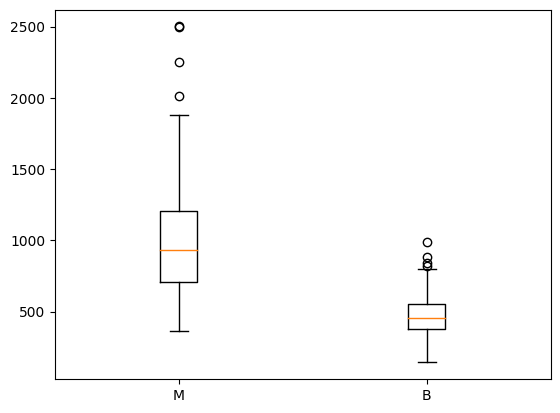

In [12]:
malignant = cancer_df.loc[cancer_df['diagnosis']=='M','area_mean'].values
benign = cancer_df.loc[cancer_df['diagnosis']=='B','area_mean'].values

plt.boxplot([malignant,benign], labels=['M', 'B']);

### Trazado de gráficos con Pandas
Pandas se puede utilizar como contenedor de Matplotlib. Una de las razones por las que podría querer realizar gráficos con Pandas es que requiere menos código.

Vamos a crear un diagrama de caja para mostrar cuánta menos sintaxis necesita para crear el gráfico con Pandas en comparación con Matplotlib puro.

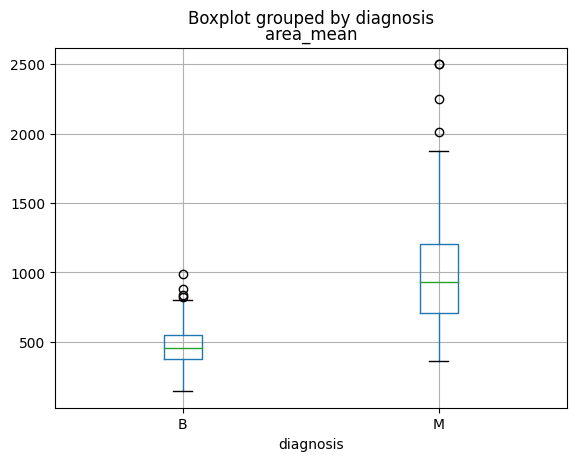

In [6]:
# Cómo deshacerse de area_mean
cancer_df.boxplot(column = 'area_mean', by = 'diagnosis');

A veces, le resultará útil utilizar la sintaxis de Matplotlib para ajustar el resultado final del gráfico. El código siguiente elimina el subtítulo y el título utilizando la sintaxis pura de Matplotlib.

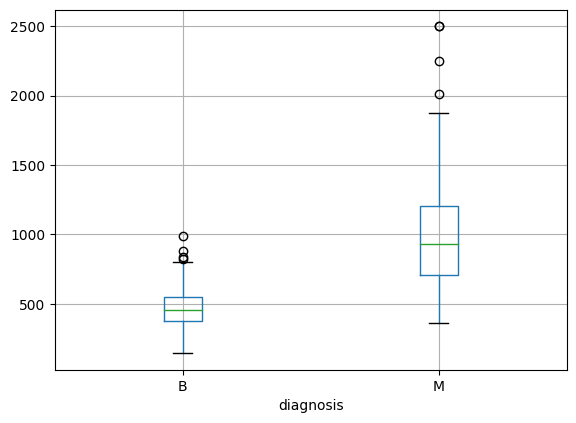

In [13]:
# La misma trama pero sin el subtítulo y título area_mean
cancer_df.boxplot(column = 'area_mean', by = 'diagnosis');
plt.title('');
plt.suptitle('');

### Trazado de gráficos con Seaborn
Se puede considerar a Seaborn como un envoltorio sobre Matplotlib. [El sitio web de Seaborn](https://seaborn.pydata.org/introduction.html) enumera una serie de ventajas de usar Seaborn, entre ellas:

* Integración cercana con las estructuras de datos de Pandas
* API orientada a conjuntos de datos para examinar relaciones entre múltiples variables.
* Soporte especializado para usar variables categóricas para mostrar observaciones o estadísticas agregadas.
* Control conciso sobre el estilo de las figuras de Matplotlib con varios temas integrados.
* Herramientas para elegir paletas de colores que revelen patrones de forma fiel en sus datos.

<Axes: xlabel='diagnosis', ylabel='area_mean'>

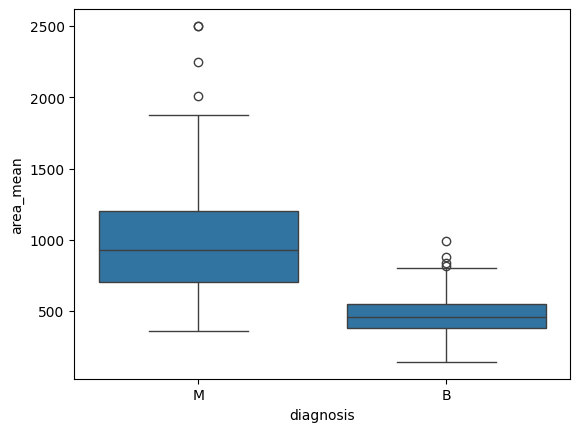

In [14]:
import seaborn as sns

sns.boxplot(x='diagnosis', y='area_mean', data=cancer_df)